Si el sistema fuera un resorte con un objeto adherido, la expresi√≥n describe c√≥mo la posici√≥n del objeto oscila en el tiempo mientras pierde energ√≠a debido al amortiguamiento (como la fricci√≥n o resistencia del aire).

**Oscilador arm√≥nicoo**




**1. Problema f√≠sico: oscilador subamortiguado**

El sistema que se modela es un oscilador arm√≥nico amortiguado descrito por la ecuaci√≥n diferencial:

$$
\frac{d^2 x}{d t^2}+\xi \frac{d x}{d t}+\omega_0^2 x=0
$$


Donde:
- $x(t)$ es la posici√≥n del oscilador en funci√≥n del tiempo.
- $\quad \xi$ es el coeficiente de amortiguamiento.
- $\quad \omega_0$ es la frecuencia angular natural del sistema.

Condiciones iniciales:

$$
x(0)=x_0, \quad \frac{d x}{d t}(0)=0
$$


La soluci√≥n exacta para el caso subamortiguado $\left(\xi<2 \omega_0\right)$ es:

$$
x(t)=x_0 e^{-\frac{t}{2} t} \cos (\omega t)
$$

donde $\omega=\sqrt{\omega_0^2-\frac{\xi^2}{4}}$.
El objetivo es resolver esta ecuaci√≥n diferencial mediante el m√©todo de redes neuronales propuesto por Lagaris et al., comparando la soluci√≥n num√©rica con la soluci√≥n anal√≠tica.

Para nuestro problema consideramos los siguientes par√°metros.

- $x_0=1$ : posici√≥n inicial.
- $\omega_0=4 \pi$ : frecuencia angular natural.
- $\xi=2.0$ : coeficiente de amortiguamiento.



**2. Arquitectura de la red neuronal**

La red neuronal se entrena para aproximar la soluci√≥n de la ecuaci√≥n diferencial:
- Entrada: tiempo $t$.
- Salidas: posici√≥n $x(t)$.
- Estructura: 3 capas ocultas con activaci√≥n GELU, con 128, 256, y 128 neuronas, respectivamente.

Condiciones iniciales: Se incorporan en la soluci√≥n propuesta $x_t(t, N)=x_0+N(t) \cdot t^2$, asegurando que $x(0)=x_0$.

**3. Entrenamiento**
- Funci√≥n de p√©rdida:
P√©rdida = Residuo de la EDO + 0.1 ‚Ä¢ Error anal√≠tico.

Donde el residuo eval√∫a si la red neuronal cumple con la ecuaci√≥n diferencial.
- Optimizaci√≥n:
- Optimizador Adam con tasa de aprendizaje inicial $l r=0.01$.
- Scheduler para ajustar din√°micamente lr basado en la p√©rdida.

**4. Resultados**
1. Comparaci√≥n de soluciones: La red neuronal se ajusta muy bien a la soluci√≥n anal√≠tica exacta.
2. Curva de p√©rdida: Muestra una convergencia efectiva durante el entrenamiento.
3. Error absoluto: Los errores son peque√±os y se mantienen dentro de una desviaci√≥n est√°ndar baja.

**C√≥digo explicado linea por linea**

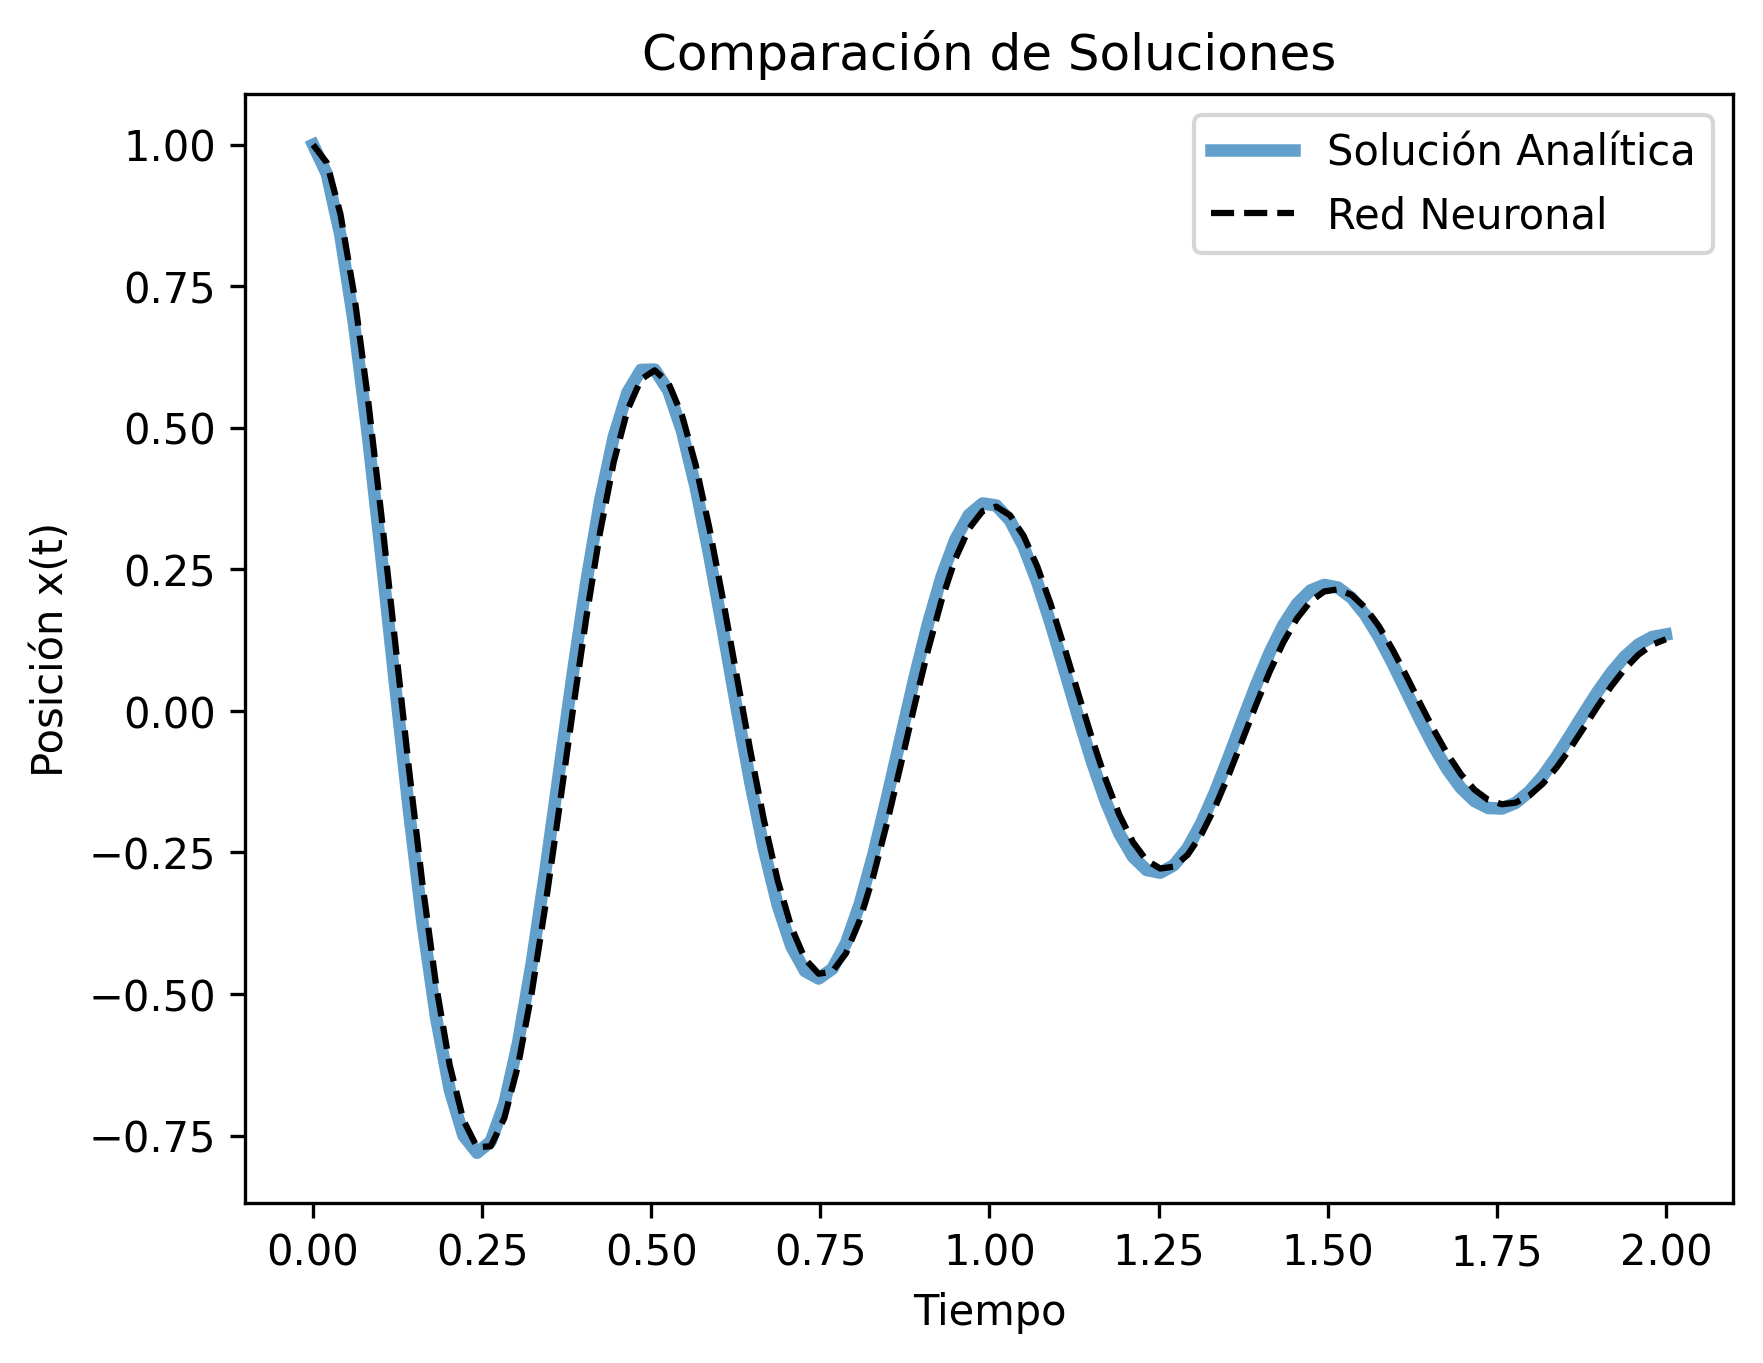

In [ ]:
# Importamos las bibliotecas necesarias
import torch  # Biblioteca para c√°lculo tensorial y redes neuronales
import torch.nn as nn  # Subm√≥dulo de PyTorch que contiene clases para construir y entrenar redes neuronales (capas, activaciones, etc.).
import matplotlib.pyplot as plt  # Para visualizaci√≥n de gr√°ficos
import numpy as np  # Operaciones num√©ricas
from math import pi  # Para constantes matem√°ticas como œÄ

torch.manual_seed(42)  # Establece una semilla para los generadores de n√∫meros aleatorios de PyTorch, asegurando la reproducibilidad de los resultados. Prop√≥sito: Asegura que los resultados sean reproducibles, ya que el entrenamiento y la inicializaci√≥n de los pesos dependen de n√∫meros aleatorios.


# Par√°metros del problema f√≠sico
x0 = 1.0  # Condici√≥n inicial: posici√≥n inicial del oscilador
w0 = 4 * pi  # Frecuencia angular natural
xi = 2.0  # Coeficiente de amortiguamiento


# Frecuencia angular modificada para el caso subamortiguado
w = torch.sqrt(torch.tensor(w0**2 - xi**2 / 4))


# Soluci√≥n anal√≠tica exacta para el caso subamortiguado
x_sol_under = lambda t: x0 * torch.exp(-0.5 * xi * t) * torch.cos(w * t)

# En esta l√≠nea, lambda t significa que la funci√≥n toma un √∫nico par√°metro t (el tiempo) y devuelve el valor calculado por la expresi√≥n despu√©s de los dos puntos.
# El uso de lambda permite definir una funci√≥n simple y concisa para calcular la soluci√≥n anal√≠tica, sin necesidad de crear una funci√≥n completa con def.
# Es √∫til porque la funci√≥n x_sol_under solo tiene una l√≠nea de c√≥digo y se utilizar√° m√°s adelante para comparar la soluci√≥n obtenida por la red neuronal con la soluci√≥n anal√≠tica.


# Definimos la arquitectura de la red neuronal
class OscillatorNN(nn.Module):
    """
    Arquitectura de una red neuronal para resolver el problema del oscilador amortiguado.
    """
    def __init__(self):
        super().__init__()
        # La red tiene tres capas ocultas y una capa de salida
        self.net = nn.Sequential(
            nn.Linear(1, 128),  # Capa 1: Entrada -> 128 neuronas
            nn.GELU(),  # Activaci√≥n GELU: suave y eficiente
            nn.Linear(128, 256),  # Capa 2: 128 -> 256 neuronas
            nn.GELU(),  # Activaci√≥n GELU
            nn.Linear(256, 128),  # Capa 3: 256 -> 128 neuronas
            nn.GELU(),  # Activaci√≥n GELU
            nn.Linear(128, 1, bias=False)  # Capa de salida: 128 -> 1 neurona
        )

    def forward(self, t):
        return self.net(t)


# Instancia de la red neuronal
N = OscillatorNN()


# Soluci√≥n aproximada garantizando las condiciones iniciales
x_t = lambda t, N: x0 + N(t) * (t**2)
# En este caso, lambda t, N define una funci√≥n que toma dos par√°metros: t (el tiempo) y N (el modelo de la red neuronal). La funci√≥n devuelve una expresi√≥n que depende de ambos par√°metros.


# Funci√≥n de p√©rdida: incluye la ecuaci√≥n diferencial y comparaci√≥n con la soluci√≥n anal√≠tica
def loss(t, N):
    t.requires_grad = True  # Permite calcular derivadas respecto a t
    x = x_t(t, N)  # Soluci√≥n aproximada
    dxdt = torch.autograd.grad(x, t, torch.ones_like(t), create_graph=True)[0]  # Primera derivada
    d2xdt2 = torch.autograd.grad(dxdt, t, torch.ones_like(t), create_graph=True)[0]  # Segunda derivada
    loss_ode = d2xdt2 + xi * dxdt + (w**2) * x  # Residuo de la ecuaci√≥n diferencial
    error_analytical = torch.mean((x - x_sol_under(t))**2)  # Diferencia con la soluci√≥n anal√≠tica
    return torch.mean(loss_ode**2) + 0.1 * error_analytical  # Combinaci√≥n ponderada de ambas p√©rdidas
# se observa como se incrementa el error.

# Optimizador y scheduler para ajuste din√°mico de la tasa de aprendizaje
optimizer = torch.optim.Adam(N.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=100, factor=0.5)

# Entrenamiento
t_train = torch.linspace(0, 2, 500).reshape(-1, 1)  # Puntos de entrenamiento
loss_history = []  # Para guardar la evoluci√≥n de la p√©rdida

for epoch in range(5000):  # Hasta 5000 iteraciones
    optimizer.zero_grad()  # Reinicia gradientes
    l = loss(t_train, N)  # Calcula la p√©rdida
    l.backward()  # Calcula los gradientes
    optimizer.step()  # Actualiza los par√°metros
    scheduler.step(l)  # Ajusta la tasa de aprendizaje
    loss_history.append(l.item())  # Guarda el valor de la p√©rdida
    if l.item() < 1e-5:  # Condici√≥n de parada
        break

# Evaluaci√≥n
t_eval = torch.linspace(0, 2, 100).reshape(-1, 1)  # Puntos de evaluaci√≥n
with torch.no_grad():
    nn_solution = x_t(t_eval, N).numpy()  # Soluci√≥n de la red neuronal
analytical_solution = x_sol_under(t_eval).numpy()  # Soluci√≥n anal√≠tica exacta

# Gr√°ficas
# 1. Soluci√≥n anal√≠tica vs red neuronal
plt.figure(dpi=300)
plt.plot(t_eval, analytical_solution, label="Soluci√≥n Anal√≠tica", linewidth=3, alpha=0.7)
plt.plot(t_eval, nn_solution, "--", label="Red Neuronal", color="k")
plt.xlabel("Tiempo")
plt.ylabel("Posici√≥n x(t)")
plt.title("Comparaci√≥n de Soluciones")
plt.legend()
plt.show()

# 2. Curva de p√©rdida
plt.figure(dpi=300)
plt.plot(loss_history, label="P√©rdida durante el entrenamiento", color="b")
plt.xlabel("√âpocas")
plt.ylabel("P√©rdida")
plt.title("Curva de Aprendizaje")
plt.legend()
plt.show()

# 3. Error absoluto
error = np.abs(nn_solution - analytical_solution)
plt.figure(dpi=300)
plt.plot(t_eval, error, label="Error Absoluto", color="r")
plt.axhline(np.std(error), color="g", linestyle="--", label=f"Desviaci√≥n Est√°ndar: {np.std(error):.5f}")
plt.xlabel("Tiempo")
plt.ylabel("Error")
plt.title("Error Absoluto y Desviaci√≥n Est√°ndar")
plt.legend()
plt.show()


Ventajas del M√©todo de Lagaris
1. No requiere discretizaci√≥n expl√≠cita: Se aproxima la soluci√≥n como una funci√≥n continua, evitando problemas de inestabilidad num√©rica.
2. Condiciones de frontera integradas: Se garantizan autom√°ticamente a trav√©s de la formulaci√≥n de la soluci√≥n aproximada $x_t(t, N)$.
3. Aplicable a sistemas complejos: Adecuado para ecuaciones diferenciales ordinarias y parciales.

Desventajas del M√©todo de Lagaris
1. Dependencia de la capacidad de la red: La precisi√≥n depende de la arquitectura de la red neuronal.
2. Alto costo computacional: Entrenar redes neuronales puede ser m√°s lento que m√©todos num√©ricos tradicionales.
3. Dif√≠cil de ajustar: Requiere cuidado al dise√±ar la funci√≥n de p√©rdida y al ajustar hiperpar√°metros.

Referencias
1. Lagaris, I. E., Likas, A., \& Fotiadis, D. I. (1998). Artificial neural networks for solving ordinary and partial differential equations. IEEE Transactions on Neural Networks.
2. Goodfellow, I., Bengio, Y., \& Courville, A. (2016). Deep Learning. MIT Press.
3. Raissi, M., Perdikaris, P., \& Karniadakis, G. E. (2019). Physics-informed neural networks: A deep learning framework for solving forward and inverse problems involving nonlinear partial differential equations. Journal of Computational Physics.


# **Descripci√≥n detallada de todos los procesos del c√≥digo.**

**Seed**

La l√≠nea `torch.manual_seed(42)` en PyTorch se utiliza para establecer una semilla aleatoria que controla la generaci√≥n de n√∫meros pseudoaleatorios dentro de PyTorch. Esto incluye operaciones como inicializaci√≥n de pesos, generaci√≥n de tensores aleatorios, divisiones de datos, entre otras.

Prop√≥sito:
Establecer una semilla permite reproducir experimentos, ya que asegura que cada vez que se ejecute el c√≥digo, los n√∫meros aleatorios generados sean los mismos.

¬øC√≥mo funciona?
PyTorch utiliza un generador de n√∫meros pseudoaleatorios (PRNG, por sus siglas en ingl√©s).
Cuando se establece una semilla con torch.manual_seed(seed), este PRNG se inicializa con el valor seed (en este caso, 42).
A partir de esa semilla, los n√∫meros aleatorios generados seguir√°n un patr√≥n predecible.

In [ ]:
import torch

# Establecer la semilla
torch.manual_seed(42)

# Generar tensores aleatorios
print(torch.rand(3))  # Siempre producir√° el mismo resultado si la semilla es 42

tensor([0.8823, 0.9150, 0.3829])




--- ---




**Par√°metros**


---


# **Frecuencia angular modificada para el caso subamortiguado**
`w = torch.sqrt(torch.tensor(w0**2 - xi**2 / 4))`

Desglose:

```
w0**2 - xi**2 / 4
```
- $w _0^2$ : Es el cuadrado de la frecuencia angular natural.
- $\xi^2 / 4$ : Es el t√©rmino relacionado con el coeficiente de amortiguamiento.
- Se calcula la diferencia entre estos t√©rminos, que debe ser positiva en el caso subamortiguado ( $\left.\xi<2 \omega_0\right)$


```
torch.sqrt(...)
```
Calcula la ra√≠z cuadrada del resultado anterior para obtener la frecuencia angular modificada (
ùúî).



```
torch.tensor(...)
```
Convierte el resultado $w_ 0^2-\frac{\xi^2}{4}$ en un tensor de PyTorch, lo cual es necesario para utilizar operaciones posteriores que involucren PyTorch (como gradientes o c√°lculos en GPU).

3. Resultado

El valor resultante, almacenado en w, corresponde a la frecuencia angular de las oscilaciones subamortiguadas, que incluye el efecto del amortiguamiento en el sistema.

$$
w=\sqrt{\omega_0^2-\frac{\xi^2}{4}}
$$


Este valor es esencial para:
1. Definir la soluci√≥n anal√≠tica exacta.
2. Evaluar el residuo de la ecuaci√≥n diferenciaƒ± en la funci√≥n de p√©rdida.





## **Soluci√≥n anal√≠tica**

`x_sol_under = lambda t: x0 * torch.exp(-0.5 * xi * t) * torch.cos(w * t)`

Esta expresi√≥n describe la soluci√≥n anal√≠tica de la posici√≥n $x(t)$ del oscilador subamortiguado.
Matem√°ticamente, la soluci√≥n tiene la forma:

$$
x(t)=x_0 e^{-\frac{\xi}{2} t} \cos (\omega t)
$$


$x_0$
- Es la condici√≥n inicial del problema, que indica la posici√≥n inicial del oscilador en $t=0$.
- En este caso, $x_0=1.0$, lo que significa que el oscilador comienza en la posici√≥n $x(0)=1.0$.



$e^{-\frac{\xi}{2} t}$ : T√©rmino de amortiguamiento

`torch.exp(-0.5 * xi * t)`
- Este t√©rmino describe la p√©rdida de energ√≠a en el sistema debido al amortiguamiento.
- Par√°metro $\xi$ :
- Representa el coeficiente de amortiguamiento, que controla cu√°nto se disipa la energ√≠a en el tiempo.
- En este caso, $\xi=2.0$.
- T√©rmino f√≠sico:
- El factor $-\frac{\xi}{2}$ proviene de la soluci√≥n de la ecuaci√≥n diferencial y asegura que la oscilaci√≥n disminuya exponencialmente en el tiempo.
- Cuanto mayor sea $\xi$, m√°s r√°pido se amortigua la oscilaci√≥n.


$\cos (\omega t)$ : Oscilaci√≥n peri√≥dica

`torch.cos(w * t)`
- Este t√©rmino representa la oscilaci√≥n arm√≥nica del sistema, con frecuencia angular modificada $\omega$.
- Par√°metro $\omega$ :
- Es la frecuencia angular efectiva del sistema subamortiguado:

$$
\omega=\sqrt{\omega_0^2-\frac{\xi^2}{4}}
$$

- Cuanto mayor sea el amortiguamiento $(\xi)$, m√°s peque√±a ser√° $\omega$, lo que implica que las oscilaciones son m√°s lentas.

t: Tiempo
- Es el tiempo en el que se eval√∫a la posici√≥n $x(t)$.
- Variable independiente que permite analizar la evoluci√≥n del sistema desde $t=0$ hasta un tiempo final definido.


Interpretaci√≥n general de la ecuaci√≥n
1. El t√©rmino $x_0$ define la posici√≥n inicial.
2. $e^{-\frac{\xi}{2} t}$. Controla c√≥mo se reduce la amplitud de las oscilaciones debido al amortiguamiento.
3. $\cos (\omega t)$ : Representa la oscilaci√≥n arm√≥nica a una frecuencia ajustada por el amortiguamiento.
4. El producto combina la oscilaci√≥n peri√≥dica con el decaimiento exponencial, dando una oscilaci√≥n amortiguada.





# **Definimos la arquitectura de la red neuronal**

A. Clase OscillatorNN

`class OscillatorNN(nn.Module):`

- Se define una clase que representa la arquitectura de la red neuronal.
- Herencia de nn.Module : Permite crear un modelo personalizado en PyTorch, ya que nn. Module es la clase base para todos los modelos de redes neuronales en PyTorch.

```
def __init__(self):
    super().__init__()
```

__init__: Es el constructor que inicializa la red neuronal.
super().__init__(): Llama al constructor de la clase base (nn.Module) para inicializar correctamente las funcionalidades b√°sicas de PyTorch.



```
self.net = nn.Sequential(
    nn.Linear(1, 128),  # Capa 1: Entrada -> 128 neuronas
    nn.GELU(),  # Activaci√≥n GELU: suave y eficiente
    nn.Linear(128, 256),  # Capa 2: 128 -> 256 neuronas
    nn.GELU(),  # Activaci√≥n GELU
    nn.Linear(256, 128),  # Capa 3: 256 -> 128 neuronas
    nn.GELU(),  # Activaci√≥n GELU
    nn.Linear(128, 1, bias=False)  # Capa de salida: 128 -> 1 neurona
)

```

`nn.Sequential`
Define una secuencia de capas en el modelo, simplificando la construcci√≥n.
Las capas se aplican en orden, desde la entrada hasta la salida.


1. Capa 1
```
nn.Linear(1, 128)
```
- Es una capa lineal (totalmente conectada).
- Entrada: 1 neurona ( $t$, el tiempo).
- Salida: 128 neuronas (aprende representaciones del tiempo).

2. Activaci√≥n GELU

`nn.GELU()`
- GELU (Gaussian Error Linear Unit) es una funci√≥n de activaci√≥n que introduce no linealidad.
- Suaviza la salida de las capas, haciendo que sea m√°s eficiente en problemas complejos.


3. Capa 2

`nn.Linear(128, 256)`

- Otra capa lineal:
- Entrada: 128 neuronas.
- Salida: 256 neuronas.

4. Activaci√≥n GELU

5. Capa 3
```
nn.Linear(256, 128)
```
- Reduce la dimensionalidad de 256 a 128 neuronas.

6. Activaci√≥n GELU


7. Capa de salida


```
nn.Linear(128, 1, bias=False)

```

- Entrada: 128 neuronas.
- Salida: 1 neurona (la salida final de la red: $N(t)$ ).
- bias=False : Elimina el sesgo, ya que las condiciones iniciales se manejan externamente $\left(x_t\right)$.




B. M√©todo forward
```
def forward(self, t):
    return self.net(t)
```

- Define c√≥mo los datos fluyen a trav√©s de la red.
- Entrada: Tiempo $t$ como un tensor.
- Salida: La evaluaci√≥n $N(t)$ de la red neuronal.

Abundemos en el m√©todo fordward.
1. def forward(self, $t$ ):
- forward : Este es el nombre del m√©todo que PyTorch utiliza para definir la pasada hacia adelante (forward pass) del modelo. Es el proceso mediante el cual los datos de entrada se pasan a trav√©s de las capas de la red neuronal para generar las predicciones.
- self: Es el objeto actual de la clase. En este caso, se refiere a la instancia de la clase OscillatorNN, que es el modelo de la red neuronal.
- t : Este es el par√°metro de entrada que representa el tiempo. Es el valor que se pasar√° a trav√©s de la red neuronal para obtener la salida (es decir, la

2. return self.net(t)
- self.net : En el constructor  _ init _  de la clase OscillatorNN, se defini√≥ self. net como una secuencia de capas ( $n n$. Sequential ). Es un objeto que contiene la arquitectura de la red neuronal, es decir, las capas de la red (por ejemplo, nn. Linear, nn.GELU).
 - En el caso de esta red neuronal, self. net incluye varias capas lineales ( nn . Linear ) y funciones de activaci√≥n ( nn .GELU ).
- self.net(t) : En esta l√≠nea, el valor de entrada t (el tiempo) se pasa a trav√©s de todas las capas de la red. El modelo aplica una serie de transformaciones (multiplicaciones de matrices, activaciones no lineales) sobre el valor de entrada t para calcular la salida.

 - self.net tiene como entrada un tensor de tama√±o (N, 1), donde N es el n√∫mero de muestras de datos (en este caso, el n√∫mero de instantes de tiempo), y t es el valor de tiempo en cada una de esas muestras.
- La salida de esta operaci√≥n es el resultado de la predicci√≥n de la red neuronal, que es la posici√≥n del oscilador en el tiempo t.


c. Instancia de la red neuronal

```
N = OscillatorNN()
```
- Crea una instancia del modelo definido.
- Ahora N es una red neuronal lista para ser entrenada y utilizada.




## **Soluci√≥n aproximada garantizando condiciones iniciales**

```
x_t = lambda t, N: x0 + N(t) * (t**2)
```
- Define la soluci√≥n aproximada:
- $ N(t)$ : Es la salida de la red neuronal que ajusta la din√°mica del oscilador.
- $t^2$ : Multiplicador que permite que $N(t)$ modele din√°micas arbitrarias sin alterar las condiciones iniciales.
- $x_0$ : Garantiza que $x(0)=x_0$, ya que:

$$
x_t(0, N)=x_0+N(0) \cdot 0^2=x_0
$$

**Consideraciones acerca de la arquitectura de la red**
1. ¬øPor qu√© se usa GELU en lugar de tanh?

GELU (Gaussian Error Linear Unit)
- Ventajas sobre tanh:
- Suavidad: GELU tiene una forma m√°s suave y continua en comparaci√≥n con funciones como tanh o ReLu. Esto puede ayudar a una convergencia m√°s eficiente, especialmente en redes profundas o con datos complejos.
- Modelo probabil√≠stico: GELU puede verse como una versi√≥n probabil√≠stica de ReLU. Se basa en una aproximaci√≥n de la funci√≥n de error de Gauss, lo que le permite trabajar de manera m√°s eficiente con redes profundas.
- Mejor rendimiento: En muchas tareas de aprendizaje profundo, especialmente en redes profundas como las de transformers, GELU ha mostrado un mejor rendimiento comparado con funciones tradicionales como tanh o Relu. Aunque tanh es una funci√≥n sigmoidea que est√° centrada en cero, puede ser propensa a desvanecimiento del gradiente en redes profundas (es decir, cuando los gradientes se hacen muy peque√±os durante el retropropagaci√≥n). En cambio, GELU ayuda a evitar este problema de manera m√°s eficiente.

¬øPor qu√© no tanh?
- Desvanecimiento del gradiente: La funci√≥n tanh tiene el problema de desvanecimiento del gradiente (vanishing gradient) en redes profundas. Esto sucede porque sus derivadas son muy peque√±as en las regiones de saturaci√≥n de la funci√≥n (cuando el valor de la entrada es grande o peque√±o). Esto puede ralentizar el proceso de entrenamiento.
- Problemas de no linealidad: Aunque tanh introduce no linealidad, su saturaci√≥n (en los extremos) puede hacer que la red neuronal sea menos eficiente para aprender patrones complejos a medida que se aumenta la profundidad de la red.

2. ¬øPor qu√© tiene tres capas y no m√°s o menos?

N√∫mero de capas y neuronas
La elecci√≥n de tres capas ocultas y el n√∫mero de neuronas est√° basada en una compromiso entre complejidad y capacidad de modelado. Existen varias razones para esta elecci√≥n:
- Complejidad del problema: El problema del oscilador amortiguado involucra una ecuaci√≥n diferencial no lineal que tiene una complejidad moderada. Si bien este es un problema relativamente sencillo, la red necesita cierta capacidad de modelado para capturar la din√°mica de la soluci√≥n.
 - Tres capas ocultas permiten a la red aprender patrones m√°s complejos sin hacer que el modelo sea excesivamente grande o propenso a sobreajustarse a los datos.

- Tama√±o de las capas (n√∫mero de neuronas):
 - 128, 256, 128 neuronas: Estas son configuraciones est√°ndar en redes profundas. La primera capa tiene 128 neuronas para una mayor representaci√≥n de las entradas, mientras que la segunda capa aumenta la capacidad de aprendizaje a 256 neuronas. La √∫ltima capa reduce la dimensionalidad, de vuelta a 128 neuronas. Estas configuraciones permiten a la red aprender de manera eficiente sin usar demasiados recursos computacionales ni hacer que el modelo sea demasiado complejo.

 - Flexibilidad: Si bien tres capas son suficientes para este caso, la cantidad de neuronas en cada capa ayuda a balancear entre aprender patrones complejos y evitar el sobreajuste.


¬øPor qu√© no m√°s o menos capas?
- Demasiadas capas podr√≠an hacer que la red sea dif√≠cil de entrenar (problema de vanishing/exploding gradients), adem√°s de que agregar m√°s neuronas y capas de manera innecesaria podr√≠a llevar al sobreajuste, donde la red aprende detalles demasiado espec√≠ficos de los datos de entrenamiento, pero no generaliza bien a datos no vistos.
- Pocas capas: Si hubiera menos de tres capas, la red podr√≠a no ser capaz de modelar completamente la complejidad de la ecuaci√≥n diferencial, especialmente con el amortiguamiento. Tres capas se consideran suficientes para encontrar un equilibrio entre la capacidad de modelado y la eficiencia.

3. ¬øPor qu√© la √∫ltima capa de salida no tiene una funci√≥n de activaci√≥n?

Capa de salida sin funci√≥n de activaci√≥n
En el dise√±o de redes neuronales, la capa de salida generalmente no tiene una funci√≥n de activaci√≥n en problemas de regresi√≥n, como en este caso, donde estamos buscando un valor continuo (la posici√≥n $x(t)$ ) en lugar de una clasificaci√≥n.

- Regresi√≥n continua: En tareas de regresi√≥n (como este problema, donde se predice la posici√≥n $x(t)$ ), no se necesita una funci√≥n de activaci√≥n en la capa de salida. El valor predicho puede ser cualquier n√∫mero real, y no est√° restringido a un rango especifico (como en las tareas de clasificaci√≥n, donde sigmoid o softmax se utilizan para restringir las salidas a valores en el intervalo $[0,1]$ o categor√≠as espec√≠ficas).
- Sin funci√≥n de activaci√≥n, la red puede predecir valores continuos y negativos sin restricciones, lo que es apropiado para este tipo de problemas.

- ¬øPor qu√© sin activaci√≥n?:
 - La salida puede ser cualquier valor real: El objetivo es aproximar la soluci√≥n del oscilador, que es un valor continuo que puede ser positivo, negativo o cero. La falta de una funci√≥n de activaci√≥n permite que el modelo aprenda valores arbitrarios.
 - Eficiencia computacional: Evitar una funci√≥n de activaci√≥n en la salida hace que la red sea un poco m√°s eficiente y evita la necesidad de hacer una operaci√≥n adicional en esa capa.

 Resumen de decisiones de dise√±o
- GELU vs tanh: GELU se utiliza debido a su suavidad y eficiencia para redes profundas, evitando problemas de desvanecimiento de gradientes, lo que puede ocurrir con tanh .
- Tres capas y neuronas: Se elige esta estructura por su capacidad de aprender patrones complejos del sistema del oscilador sin ser innecesariamente grande ni sobreajustarse.
- Sin funci√≥n de activaci√≥n en la salida: En problemas de regresi√≥n, no es necesario aplicar una funci√≥n de activaci√≥n en la capa de salida, ya que el objetivo es predecir valores continƒ±os sin restricciones.

**GElu**

La funci√≥n GELU (Gaussian Error Linear Unit) es una activaci√≥n no lineal utilizada en redes neuronales, y su forma es suave y continua, similar a la funci√≥n ReLU, pero con una transici√≥n m√°s suave y probabil√≠stica. Se define matem√°ticamente como:

$$
\operatorname{GELU}(x)=0.5 x\left(1+\tanh \left(\sqrt{\frac{2}{\pi}}\left(x+0.044715 x^3\right)\right)\right)
$$


Caracter√≠sticas:
- Suavidad: No tiene una transici√≥n brusca como la funci√≥n ReLU o tanh. Es m√°s suave, lo que facilita el entrenamiento.
- Simetr√≠a alrededor de cero: A diferencia de ReLU, que es cero para los valores negativos, GELU tiene un comportamiento m√°s suave en valores negativos.
- No linealidad: Introduce no linealidad en la red, permitiendo que la red neuronal aprenda relaciones con $\downarrow$ jas entre las entradas y las salidas.

In [ ]:
#- Para $x>0$ : Similar a Relu, pero con una transici√≥n m√°s suave y continua.
#- Para $x<0$ : A diferencia de ReLu , GELU no es cero, sino que se aproxima de manera suave a cero, permitiendo que los valores negativos tambi√©n influyan en el entrenamiento.
import numpy as np
import matplotlib.pyplot as plt

# Definir la funci√≥n GELU
def gelu(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * x**3)))

# Crear un rango de valores para x
x = np.linspace(-3, 3, 100)

# Graficar
plt.figure(figsize=(8, 6))
plt.plot(x, gelu(x), label="GELU", color="b", linewidth=2)
plt.title("Funci√≥n de Activaci√≥n GELU")
plt.xlabel("x")
plt.ylabel("GELU(x)")
plt.grid(True)
plt.legend()
plt.show()


##**Funci√≥n de p√©rdida**

In [ ]:
# Funci√≥n de p√©rdida: incluye la ecuaci√≥n diferencial y comparaci√≥n con la soluci√≥n anal√≠tica


def loss(t, N):
"""
La funci√≥n loss(t, N) es una funci√≥n de p√©rdida (tambi√©n conocida como funci√≥n de coste) que se utiliza para entrenar la red neuronal.
Esta funci√≥n mide qu√© tan bien las predicciones de la red neuronal se ajustan a las soluciones correctas del problema de oscilador amortiguado,
considerando tanto la ecuaci√≥n diferencial que describe el sistema como la soluci√≥n anal√≠tica exacta.
"""


    t.requires_grad = True  # Permite calcular derivadas respecto a t
    """
    - Prop√≥sito: Establece que el tensor t necesita gradientes durante el c√°lculo.
    - ¬øPor qu√© es necesario?: Para entrenar la red neuronal, necesitamos calcular las derivadas de las predicciones de la red con respecto al tiempo $t$, ya que estamos resolviendo una ecuaci√≥n diferencial.
      Al hacer esto, indicamos que $t$ debe ser tratado como una variable "diferenciable" para poder calcular derivadas de las funciones que dependen de $t$.
    - requires_grad=True habilita la posibilidad de calcular el gradiente de t cuando realizamos las operaciones de autograd en PyTorch.
    """

    x = x_t(t, N)  # Soluci√≥n aproximada
    """
    - Prop√≥sito: Calcula la soluci√≥n aproximada de la red neuronal para un valor de tiempo t .
    - ¬øQu√© hace?: Llama a la funci√≥n x_t , que toma el valor de tiempo t y la red neuronal N como entrada, y devuelve una predicci√≥n de la posici√≥n del oscilador en el tiempo t (es decir, la salida de la red neuronal).
    - Nota: La funci√≥n x_t es una aproximaci√≥n que la red neuronal est√° aprendiendo a predecir, con el objetivo de ajustarse a la soluci√≥n correcta del problema de oscilador amortiguado.
    """

    dxdt = torch.autograd.grad(x, t, torch.ones_like(t), create_graph=True)[0]  # Primera derivada
    """
    - Prop√≥sito: Calcula la primera derivada de x respecto al tiempo t (es decir, la velocidad del oscilador).
    - ¬øQu√© hace?: Usa la funci√≥n torch.autograd.grad para calcular el gradiente de x con respecto a t . Esto da como resultado la velocidad ( dx/dt ), que es la primera derivada de la posici√≥n del oscilador con respecto al tiempo.
    - Detalles:
- torch.ones_like(t) : Este argumento se usa para indicar que queremos calcular el gradiente de x con respecto a t considerando un valor de "1" como el gradiente de referencia.
- create_graph=True : Esto se establece para permitir que el c√°lculo del gradiente sea diferenciable a su vez. Esto es necesario porque, en la siguiente l√≠nea,
  tambi√©n se calcular√° el gradiente de dxdt (segunda derivada), y necesitamos el grafo de c√°lculo para ese prop√≥sito.

    """

    d2xdt2 = torch.autograd.grad(dxdt, t, torch.ones_like(t), create_graph=True)[0]  # Segunda derivada
    """
    - Prop√≥sito: Calcula la segunda derivada de x respecto al tiempo t (es decir, la aceleraci√≥n del oscilador).
    - ¬øQu√© hace?: Calcula la derivada de la velocidad ( dxdt ) con respecto al tiempo t usando torch.autograd.grad. Esto da la aceleraci√≥n ( $\mathrm{d}^2 \mathrm{x} / \mathrm{dt}^2$ ), que es la segunda derivada de la posici√≥n con respecto al tiempo.
  - Detalles:
    - dxdt es la primera derivada que obtuvimos en el paso anterior, y estamos calculando su gradiente respecto a t para obtener la aceleraci√≥n.
    - Al igual que en el paso anterior, usamos create_graph=True para poder calcular m√°s derivadas en el futuro si fuera necesario.
    """

    """
    ***. [0]

    La funci√≥n torch.autograd.grad devuelve una tupla de tensores. En este caso, aunque estemos calculando un √∫nico gradiente (la primera derivada de x con respecto a $t$ ),
    la funci√≥n devuelve una tupla con un solo tensor, ya que el c√°lculo de gradientes siempre devuelve una tupla, incluso si hay solo un tensor.

    El [0] extrae el primer (y √∫nico) tensor de esa tupla, que es el gradiente de x con respecto a t , o la velocidad en el contexto del problema del oscilador. Entonces, [0] simplemente selecciona el tensor dentro de la tupla.
    """

    loss_ode = d2xdt2 + xi * dxdt + (w**2) * x  # Residuo de la ecuaci√≥n diferencial


    error_analytical = torch.mean((x - x_sol_under(t))**2)  # Diferencia con la soluci√≥n anal√≠tica
    return torch.mean(loss_ode**2) + 0.1 * error_analytical  # Combinaci√≥n ponderada de ambas p√©rdidas


**Discusi√≥n de loss_ode**

`loss_ode = d2xdt2 + xi * dxdt + (w**2) * x ` # Residuo de la ecuaci√≥n diferencial

- Prop√≥sito: Calcula el residuo de la ecuaci√≥n diferencial del oscilador amortiguado.
- ¬øQu√© hace?: Esta l√≠nea implementa la ecuaci√≥n diferencial que describe el movimiento del oscilador amortiguado:

$$
\frac{d^2 x}{d t^2}+\xi \cdot \frac{d x}{d t}+\omega^2 \cdot x=0
$$

- donde:

  - $\frac{d^2 x}{d t^2}$ es la aceleraci√≥n (d2xdt2).
  - $\frac{d x}{d t}$ es la velocidad (dxdt ).
  - $\quad x$ es la posici√≥n del oscilador.
  - $\xi$ es el coeficiente de amortiguamiento.
  - $\omega^2$ es la frecuencia angular cuadrada.


- ¬øQu√© significa?: El residuo es la diferencia entre el lado izquierdo de la ecuaci√≥n diferencial (lo que se calcula usando la derivada de x ) y el valor esperado, que debe ser cero si el modelo est√° siguiendo correctamente la ecuaci√≥n. El residuo se debe minimizar para que el modelo ajuste bien la ecuaci√≥n diferencial.




```
error_analytical = torch.mean((x - x_sol_under(t))**2)
```
- Prop√≥sito: Calcula el error entre la soluci√≥n aproximada de la red neuronal y la soluci√≥n anal√≠tica exacta.
- ¬øQu√© hace?: Compara la predicci√≥n de la red neuronal ( $x$ ) con la soluci√≥n anal√≠tica exacta ( $x$ _sol_under(t) ) usando el error cuadr√°tico medio (MSE).
- x_sol_under(t) es la soluci√≥n exacta del oscilador amortiguado que has definido antes.
- torch.mean((x - x_sol_under(t) )**2) calcula la media del cuadrado de las diferencias entre la soluci√≥n predicha por la red y la soluci√≥n exacta.
- ¬øPor qu√© es importante?: Este t√©rmino mide cu√°n cerca est√° la red neuronal de la soluci√≥n correcta en t√©rminos de la posici√≥n del oscilador.


`return torch.mean(loss_ode**2) + 0.1 * error_analytical`

- Prop√≥sito: Calcula la p√©rdida total (o coste) combinando los dos t√©rminos de error: el residuo de la ecuaci√≥n diferencial y el error con respecto a la soluci√≥n anal√≠tica.
- ¬øQu√© hace?:
- torch.mean(loss_ode**2) : La p√©rdida de la ecuaci√≥n diferencial se calcula como el cuadrado del residuo loss_ode. Al elevarlo al cuadrado, se asegura de que los errores no negativos se sumen de manera efectiva.
- 0.1 * error_analytical : El error con respecto a la soluci√≥n anal√≠tica se pondera con un factor de 0.1. Esto permite ajustar la importancia relativa entre ambos t√©rminos de la p√©rdida. El residuo de la ecuaci√≥n diferencial tiene mayor peso en este caso, ya que el objetivo principal es que la red neuror resuelva correctamente la ecuaci√≥n diferencial.

- ¬øQu√© significa el retorno?: La funci√≥n devuelve la p√©rdida total como una combinaci√≥n de ambas fuentes de error. Durante el entrenamiento, esta p√©rdida se minimizar√° para ajustar los pesos de la red neuronal y mejorar sus predicciones.

La funci√≥n loss(t, N) calcula el error de la red neuronal en dos aspectos:
1. Residuo de la ecuaci√≥n diferencial: Mide cu√°n bien el modelo satisface la ecuaci√≥n diferencial que describe el movimiento del oscilador amortiguado.
2. Diferencia con la soluci√≥n anal√≠tica: Mide cu√°n cerca est√°n las predicciones del modelo de la soluci√≥n exacta.

Estos dos errores se combinan en una p√©rdida total que se utiliza para ajustar los par√°metros de la red neuronal mediante optimizaci√≥n.

##**OPtimizador**

In [ ]:
# Optimizador y scheduler para ajuste din√°mico de la tasa de aprendizaje
optimizer = torch.optim.Adam(N.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=100, factor=0.5)

- `torch.optim.Adam`:
- Adam (Adaptive Moment Estimation) es un optimizador que utiliza una combinaci√≥n de dos t√©cnicas de optimizaci√≥n:
1. Momentum: En lugar de utilizar solo la derivada en un punto, Adam tambi√©n toma en cuenta los gradientes pasados, lo cual ayuda a suavizar las actualizaciones y hace que el proceso de optimizaci√≥n sea m√°s estable.
2. Escalado adaptativo de la tasa de aprendizaje: Adam ajusta la tasa de aprendizaje de manera individual para cada par√°metro, adapt√°ndose a las caracter√≠sticas de los gradientes.

Adam es muy popular porque:
- Converge m√°s r√°pido que otros m√©todos (como el gradiente descendente est√°ndar).
- No requiere una tasa de aprendizaje fija, ya que ajusta la tasa autom√°ticamente.
- Es especialmente eficiente para modelos grandes y problemas con muchos par√°metros.

- `N. parameters()`:
  - N es la instancia de la red neuronal `OscillatorNN` (definida previamente).
  - El m√©todo `parameters()` devuelve todos los par√°metros del modelo (pesos y sesgos de las capas de la red neuronal). Esos son los par√°metros que el optimizador Adam ajustar√° durante el entrenamiento para minimizar la funci√≥n de p√©rdida.

- `lr=0.01` :
 - Ir es la tasa de aprendizaje (learning rate), un hiperpar√°metro que controla la magnitud de los pasos que el optimizador da en cada iteraci√≥n.
 - Aqu√≠, se establece la tasa de aprendizaje inicial en 0.01. Esto significa que, en principio, el optimizador ajustar√° los par√°metros en pasos de tama√±o 0.01 durante cada actualizaci√≥n.


`scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=100, factor=0.5)`

En esta l√≠nea se define un scheduler de tasa de aprendizaje, que es un mecanismo que ajusta din√°micamente la tasa de aprendizaje durante el entrenamiento. El scheduler ayuda a mejorar la convergencia del modelo reduciendo la tasa de aprendizaje cuando el progreso en la minimizaci√≥n de la funci√≥n de p√©rdida se estanca.


- `torch.optim.lr_scheduler.ReduceLROnPlateau`:
 - Este tipo de scheduler reduce la tasa de aprendizaje cuando la funci√≥n de p√©rdida deja de mejorar durante un n√∫mero de iteraciones o √©pocas consecutivas. Es muy √∫til cuando el modelo se estanca en una regi√≥n de la funci√≥n de p√©rdida y no puede mejorar significativamente.
 - `ReduceLROnPlateau` se basa en el comportamiento de la p√©rdida: cuando no hay mejoras (la p√©rdida no mejora significativamente durante un n√∫mero de √©pocas), el scheduler reduce la tasa de aprendizaje para que el modelo pueda hacer ajustes m√°s finos.

 - `optimizer`:
  - El optimizaror que ser√° ajustado din√°micamente por este scheduler. Es el optimizador Adam que definimos anteriormente.
- `patience=100`:
  - Este es un par√°metro clave del scheduler, que define el n√∫mero de √©pocas (o iteraciones) durante las cuales el modelo puede no mejorar en su rendimiento antes de que la tasa de aprendizaje sea reducida.
  - En este caso, el valor de `patience=100` significa que si la funci√≥n de p√©rdida no mejora durante 100 √©pocas consecutivas, el scheduler reducir√° la tasa de aprendizaje.

- `factor=0.5 `:
 - Este par√°metro define por cu√°nto se reducir√° la tasa de aprendizaje cuando la p√©rdida no haya mejorado durante el n√∫mero de √©pocas indicado por patience.
 - En este caso, factor=0.5 significa que la tasa de aprendizaje se reducir√° a la mitad cuando se active el scheduler. Por ejemplo, si la tasa de aprendizaje era de 0.01, despu√©s de reducirse, ser√° de 0.005.

##**Entrenamiento**

In [ ]:
# Entrenamiento
t_train = torch.linspace(0, 2, 500).reshape(-1, 1)  # Puntos de entrenamiento
loss_history = []  # Para guardar la evoluci√≥n de la p√©rdida

for epoch in range(5000):  # Hasta 5000 iteraciones
    optimizer.zero_grad()  # Reinicia gradientes
    l = loss(t_train, N)  # Calcula la p√©rdida
    l.backward()  # Calcula los gradientes
    optimizer.step()  # Actualiza los par√°metros
    scheduler.step(l)  # Ajusta la tasa de aprendizaje
    loss_history.append(l.item())  # Guarda el valor de la p√©rdida
    if l.item() < 1e-5:  # Condici√≥n de parada
        break


```
t_train = torch.linspace(0, 2, 500).reshape(-1, 1)  # Puntos de entrenamiento

```
- torch.linspace(0, 2, 500):

  Esta funci√≥n de PyTorch crea un tensor de 500 puntos igualmente distribuidos en el intervalo de 0 a 2. La secuencia resultante ser√° algo como:
  [0, 0.004008, 0.008016, ..., 2].
  Es decir, genera valores de t (tiempo) para entrenar el modelo, distribuidos uniformemente entre 0 y 2.

- .reshape(-1, 1):
Este m√©todo cambia la forma (shape) del tensor resultante de la funci√≥n linspace para que sea de una sola columna y m√∫ltiples filas.
 - El -1 indica que la dimensi√≥n correspondiente se ajustar√° autom√°ticamente seg√∫n la longitud del tensor (en este caso, 500 elementos).
 - El 1 indica que queremos que haya una sola columna, convirtiendo el tensor en una matriz de tama√±o $(500,1)$.

En resumen, t_train es un tensor de 500 valores en el intervalo [0, 2], cada uno representando un punto de tiempo para el entrenamiento, con una forma de $(500,1)$.



```
loss_history = []
```
Esta l√≠nea inicializa una lista vac√≠a llamada `loss_history`. Esta lista se usar√° para almacenar la evoluci√≥n de la p√©rdida durante el entrenamiento, permitiendo luego graficarla y analizar c√≥mo ha cambiado a medida que el modelo aprende.


**Bucle de entrenamiento:**

`for epoch in range(5000)`:
Este bucle `for` se ejecutar√° hasta 5000 √©pocas (iteraciones). Cada √©poca representa una iteraci√≥n completa a trav√©s de los datos de entrenamiento. En cada iteraci√≥n, se realiza una actualizaci√≥n de los par√°metros del modelo para que se ajuste mejor a la soluci√≥n deseada (minimizaci√≥n de la funci√≥n de p√©rdida).


`optimizer.zero_grad()`
- `optimizer.zero_grad() `:

Esta l√≠nea reinicia los gradientes acumulados de las iteraciones anteriores.
 - Los gradientes se calculan durante el proceso de retropropagaci√≥n ( backward() ), y es importante reiniciarlos en cada √©poca para evitar que se acumulen gradientes de √©pocas previas.
 - Si no se llamara a `zero_grad()`, los gradientes se acumular√≠an, lo que afectar√≠a negativamente a la actualizaci√≥n de los par√°metros en cada paso.

`l = loss(t_train, N)`
- `loss(t_train, N)`:

Calcula el valor de la funci√≥n de p√©rdida para los puntos de entrenamiento `t_train` y el modelo N .
 - El modelo N es una red neuronal definida previamente (la clase `OscillatorNN `), que se eval√∫a para estos puntos de tiempo `t_train`.
 - La funci√≥n de p√©rdida mide qu√© tan lejos est√° la predicci√≥n de la red neuronal de la soluci√≥n esperada (anal√≠tica), y en este caso incluye tanto la ecuaci√≥n diferencial como la comparaci√≥n con la soluci√≥n anal√≠tica.
 - El valor de la p√©rdida `l` es un escalar que indica la calidad de la soluci√≥n de la red neuronal para ese conjunto de puntos de tiempo.


`l.backward()`
- `1.backward()` :

Esta l√≠nea realiza la retropropagaci√≥n para calcular los gradientes de la funci√≥n de p√©rdida `l` con respecto a los par√°metros de la red neuronal (pesos y sesgos).
- La retropropagaci√≥n consiste en propagar el error de la funci√≥n de p√©rdida hacia atr√°s a trav√©s de la red neuronal para calcular los gradientes, los cuales indican c√≥mo deben actualizarse los par√°metros del modelo.
- Estos gradientes se almacenan en los atributos de cada par√°metro del modelo, para ser utilizados en la actualizaci√≥n de los pesos.


`optimizer.step()`
- `optimizer.step()`:

Esta l√≠nea actualiza los par√°metros de la red neuronal.
- Usando los gradientes calculados durante la retropropagaci√≥n, el optimizador (en este caso Adam) ajusta los pesos de la red para reducir la funci√≥n de p√©rdida.
- El tama√±o de la actualizaci√≥n est√° determinado por la tasa de aprendizaje ( `lr` ) definida anteriormente, y se ajusta de forma adaptativa por el optimizador.

`scheduler.step(l)`
- `scheduler.step(l)`:

Esta l√≠nea ajusta la tasa de aprendizaje usando el scheduler que fue definido antes.
 - El scheduler `ReduceLROnPlateau` ajusta la tasa de aprendizaje si detecta que la funci√≥n de p√©rdida `l` no ha mejorado en las √∫ltimas √©pocas (seg√∫n los par√°metros patience y factor ).
 - Si el valor de la p√©rdida no mejora despu√©s de un n√∫mero de √©pocas especificado (100 en este caso), la tasa de aprendizaje se reduce autom√°ticamente, lo que permite hacer ajustes m√°s finos al final del entrenamiento.



`loss_history.append(l.item())`
- `loss_history.append(l.item())`:

Esta l√≠nea agrega el valor de la p√©rdida (como un n√∫mero escalar) a la lista loss_history .
 - `l.item()` convierte el tensor de la p√©rdida l en un n√∫mero est√°ndar de Python, lo que permite almacenarlo en la lista.
 - La lista `loss_history` contendr√° todos los valores de la p√©rdida durante las √©pocas del entrenamiento, lo cual es √∫til para graficar y analizar c√≥mo va evolucionando el aprendizaje.



`if l.item() < 1e-5`:
- `if l.item() < 1e-5`: :

Esta es una condici√≥n de parada que permite terminar el entrenamiento si la p√©rdida alcanza un valor suficientemente bajo.
 - 1e-5 es un valor muy peque√±o, que indica que la red ha convergido a una soluci√≥n bastante buena.
 - Si la p√©rdida es menor que este umbral, significa que el modelo ya ha aprendido lo suficiente, por lo que el entrenamient $\downarrow$, detiene antes de llegar a las 5000 √©pocas.


 `break`
- `break` :

Si la condici√≥n del if es verdadera (es decir, si la p√©rdida es menor que 1e-5), la ejecuci√≥n del bucle de entrenamiento se detiene inmediatamente.
 - Esto es una medida para evitar entrenar innecesariamente por m√°s √©pocas cuando el modelo ya ha alcanzado un buen rendimiento.


 - El c√≥digo entrena la red neuronal para resolver el problema del oscilador amortiguado.
- En cada iteraci√≥n:
1. Se reinician los gradientes.
2. Se calcula la p√©rdida (c√≥mo de mal est√° el modelo).
3. Se realiza la retropropagaci√≥n para obtener los gradientes.
4. Se actualizan los par√°metros del modelo.
5. Se ajusta la tasa de aprendizaje si es necesario.
6. Se guarda el valor de la p√©rdida en una lista para monitorear el progreso.
- El proceso se detiene si el valor de la p√©rdida es suficientemente bajo (por debajo de 1e-5 ), lo que indica que el modelo ha aprendido bien.

# **Evaluaci√≥n**

In [ ]:
# Evaluaci√≥n
t_eval = torch.linspace(0, 2, 100).reshape(-1, 1)  # Puntos de evaluaci√≥n
with torch.no_grad():
    nn_solution = x_t(t_eval, N).numpy()  # Soluci√≥n de la red neuronal
analytical_solution = x_sol_under(t_eval).numpy()  # Soluci√≥n anal√≠tica exacta

1. `t_eval = torch.linspace(0, 2, 100).reshape(-1, 1)`
- `torch.linspace(0, 2, 100)`:
  - Esta funci√≥n genera un tensor con 100 valores igualmente espaciados en el intervalo de 0 a 2. Los puntos de tiempo `t_eval` se generan para evaluar el rendimiento del modelo en estos puntos.
  - El prop√≥sito de esta l√≠nea es crear un conjunto de puntos `t_eval` que cubren el rango de tiempo $[0,2]$ para el cual se desea verificar la soluci√≥n de la red neuronal.

- `.reshape(-1, 1)`:
 - Al igual que en el bloque de entrenamiento, este m√©todo cambia la forma del tensor generado para convertirlo en un tensor columna de tama√±o (100, 1), es decir, con 100 filas y 1 columna.
 - Este paso es necesario para asegurar que el modelo reciba la entrada con la forma adecuada (en este caso, de una sola dimensi√≥n para cada punto de tiempo).

 2. `with torch.no_grad()`:
- `torch.no_grad()`:
 - Este es un contexto que desactiva el seguimiento de los gradientes, lo que significa que no se calcular√°n los gradientes de los tensores durante las operaciones dentro de este contexto.
 - Esto es importante durante la evaluaci√≥n porque no necesitamos calcular gradientes (que son necesarios solo para el entrenamiento), lo que hace el proceso m√°s eficiente y r√°pido.
 - Al utilizar `torch.no_grad()` , PyTorch evita almacenar la informaci√≥n necesaria para realizar la retropropagaci√≥n, reduciendo el uso de memoria y acelerando el c√≥mputo.

 3. `nn_solution = x_t(t_eval, N).numpy()`
 - `x_t(t_eval, N)`:
 - `x_t` es la funci√≥n lambda que define la soluci√≥n aproximada de la red neuronal para un conjunto de puntos de tiempo t_eval . Se calcula utilizando el modelo entrenado N .
 - Aqu√≠, `x_t(t_eval, N)` calcula las salidas de la red neuronal `N` para los valores de tiempo t_eval , lo cual da la soluci√≥n aproximada de la red neuronal para esos puntos de tiempo.

- `.numpy()`:
 - Este m√©todo convierte el tensor de PyTorch resultante de `x_t(t_eval, N )` en un arreglo de Numpy.
 - Esto es √∫til porque Matplotlib y otras herramientas de an√°lisis en Python trabajan de forma m√°s eficiente con arreglos de Numpy en lugar de tensores de PyTorch, por lo que esta conversi√≥n es esencial para realizar las gr√°ficas y an√°lisis posteriores.

 4. `analytical_solution = x_sol_under(t_eval).numpy()`
- `X_sol_under(t_eval)`:
 - `x_sol_under` es la funci√≥n lambda que representa la soluci√≥n anal√≠tica exacta para el oscilador amortiguado, calculada a partir de la f√≥rmula f√≠sica que modela el comportamiento del sistema.
 - Esta l√≠nea eval√∫a la soluci√≥n anal√≠tica para los mismos puntos de tiempo `t_eval` generados en la primera l√≠nea.
 - Al evaluar `x_sol_under(t_eval)` , obtenemos un tensor con los valores de la posici√≥n en el tiempo, seg√∫n la soluci√≥n exacta del oscilador amortiguado.
- `.numpy()`:
- Similar a la l√≠nea anterior, esta llamada convierte el tensor de la soluci√≥n anal√≠tica en un arreglo de Numpy para poder utilizarlo en an√°lisis y visualizaci√≥n posteriores.


Resumen:

Este bloque de c√≥digo realiza la evaluaci√≥n del modelo entrenado al calcular y comparar las soluciones aproximadas y exactas en un conjunto de puntos de tiempo:
1. Se crean 100 puntos de tiempo entre 0 y 2 para evaluar la red neuronal.
2. Dentro del contexto de torch.no_grad( ) , se calculan las predicciones de la red neuronal usando esos puntos de tiempo y se almacenan en nn_solution.
3. Tambi√©n se calcula la soluci√≥n anal√≠tica exacta para esos mismos puntos de tiempo y se almacena en analytical_solution.

##**Secci√≥n de gr√°fica de resultados**

In [ ]:
# Gr√°ficas
# 1. Soluci√≥n anal√≠tica vs red neuronal
plt.figure(dpi=300) # Esta funci√≥n crea una nueva figura en Matplotlib, que es donde se van a dibujar los gr√°ficos.
plt.plot(t_eval, analytical_solution, label="Soluci√≥n Anal√≠tica", linewidth=3, alpha=0.7)
plt.plot(t_eval, nn_solution, "--", label="Red Neuronal", color="k")
plt.xlabel("Tiempo")
plt.ylabel("Posici√≥n x(t)")
plt.title("Comparaci√≥n de Soluciones")
plt.legend()
plt.show()


- `plt.plot(t_eval, analytical_solution, label="Soluci√≥n Anal√≠tica", linewidth=3, alpha=0.7) `:
 - `t_eval `: Este es el conjunto de puntos de tiempo (en el intervalo de 0 a 2) que hemos generado previamente para la evaluaci√≥n.
 - `analytical_solution` : Son los valores de la soluci√≥n anal√≠tica para los puntos de tiempo correspondientes a t_eval .
 - `label="Soluci√≥n Anal√≠tica" `: Establece la etiqueta para la leyenda del gr√°fico, que en este caso es "Soluci√≥n Anal√≠tica". Esta etiqueta aparece en el gr√°fico para indicar qu√© l√≠nea corresponde a la soluci√≥n exacta.
 - `linewidth=3` : Ajusta el ancho de la l√≠nea de la gr√°fica a 3. Esto hace que la l√≠nea sea m√°s gruesa y m√°s visible en el gr√°fico.
 - `alpha=0.7`: Ajusta la transparencia de la l√≠nea. El valor alpha=0.7 significa que la l√≠nea tendr√° un $30 \%$ de transparencia, lo que hace que sea ligeramente m√°s suave.



- `plt.plot(t_eval, nn_solution, "--", label="Red Neuronal", color="k")`:
 - `t_eval` : Los mismos puntos de tiempo de antes, en el intervalo de 0 a 2.
 - `nn_solution` : Los valores calculados por la red neuronal para los mismos puntos de tiempo `t_eval`.
 - `"--" `: Establece el estilo de la l√≠nea como una l√≠nea discontinua (l√≠nea punteada). Esto ayuda a distinguir visualmente entre las dos soluciones (anal√≠tica y de la red neuronal).
 - `label="Red Neuronal" `: Define la etiqueta para esta l√≠nea en la leyenda, que ser√° "Red Neuronal".
  - `color="k" `: Define el color de la l√≠nea como "k", que es una abreviatura en Matplotlib para negro. Esto hace que la l√≠nea de la red neuronal sea de color negro.

- `plt.xlabel("Tiempo")`
 - Esta l√≠nea establece la etiqueta del eje $\mathbf{x}$, que en este caso es "Tiempo". Esto es importante para que el gr√°fico tenga etiquetas claras y sea f√°cilmente interpretable.

- `plt.ylabel("Posici√≥n x(t)")`:
 - Aqu√≠ se define la etiqueta del eje $y$, que ser√° "Posici√≥n $x(t)$ ", indicando que el gr√°fico muestra c√≥mo cambia la posici√≥n del oscilador con el tiempo.

- `plt.title("Comparaci√≥n de Soluciones")`:
 - Establece el t√≠tulo del gr√°fico, que en este caso es "Comparaci√≥n de Soluciones". Esto da un contexto al gr√°fico y ayuda a entender r√°pidamente qu√© se est√° comparando.

- `plt.legend()`:
- Esta funci√≥n agrega una leyenda al gr√°fico. La leyenda utilizar√° las etiquetas definidas previamente en label="Soluci√≥n Anal√≠tica" y label="Red Neuronal" para identificar las dos l√≠neas que se dibujaron.
- La leyenda ayuda a que el lector identifique cu√°l es la soluci√≥n anal√≠tica y cu√°l es la salida de la red neuronal en el gr√°fico.